In [12]:
!pip install -q keras

In [13]:
from keras import applications
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [14]:
model=applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
print('Model Loaded.')

Model Loaded.


In [15]:
top_model= Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(3, activation='softmax'))

In [16]:
print(top_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
print(len(top_model.trainable_weights))
model.trainable= False
print(len(top_model.trainable_weights), len(top_model.non_trainable_weights))

30
4 26


In [18]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=40, 
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  fill_mode='nearest')
test_datagen= ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/covid_project/train',
                                                    target_size=(224,224), 
                                                    batch_size=10,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/covid_project/test',
                                                    target_size=(224,224), 
                                                    batch_size=10,
                                                    class_mode='categorical')
top_model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

Found 150 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [19]:
output= top_model.fit_generator(train_generator,
                                 epochs=20,
                                 steps_per_epoch=20,
                                 validation_data=test_generator)

Epoch 1/20
20/20 [==============================] - 7s 363ms/step - loss: 2.9931 - accuracy: 0.4150 - val_loss: 1.2594 - val_accuracy: 0.4667
Epoch 2/20
20/20 [==============================] - 8s 395ms/step - loss: 1.0223 - accuracy: 0.5950 - val_loss: 0.7976 - val_accuracy: 0.7333
Epoch 3/20
20/20 [==============================] - 7s 340ms/step - loss: 0.5386 - accuracy: 0.8000 - val_loss: 0.7928 - val_accuracy: 0.8000
Epoch 4/20
20/20 [==============================] - 8s 389ms/step - loss: 0.4899 - accuracy: 0.8050 - val_loss: 0.3431 - val_accuracy: 0.8000
Epoch 5/20
20/20 [==============================] - 7s 326ms/step - loss: 0.4981 - accuracy: 0.7950 - val_loss: 0.7742 - val_accuracy: 0.7667
Epoch 6/20
20/20 [==============================] - 7s 346ms/step - loss: 0.4111 - accuracy: 0.8650 - val_loss: 0.4072 - val_accuracy: 0.7667
Epoch 7/20
20/20 [==============================] - 7s 351ms/step - loss: 0.4268 - accuracy: 0.8350 - val_loss: 0.2835 - val_accuracy: 0.7667
Epoch 

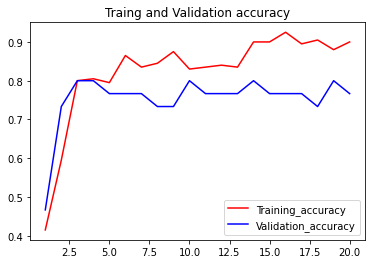

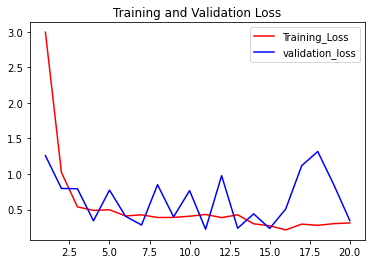

In [20]:
import matplotlib.pyplot as plt

acc=output.history['accuracy']
val_acc=output.history['val_accuracy']
loss= output.history['loss']
val_loss= output.history['val_loss']
epochs= range(1,len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training_accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Traing and Validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'r', label='Training_Loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()